# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Riza Zamzami

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Musim Dalam Penggunaan Sepeda?
- Bagaimana Sebaran Data Pengguna Sepeda Pada Weekday dan Holiday?
- Berapa Presentase Pengguna Sepeda yang Berlangganan dan Yang Tidak Berlangganan?

## Import Semua Packages/Library yang Digunakan

In [1]:
#Memasukan Semua Library Yang diGunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Memuat tabel Days
days_df = pd.read_csv("day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel Hours
hours_df = pd.read_csv("hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tabel Days: tabel ini menyimpan berbagai informasi terkait instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.
- Tabel Hours: tabel ini menyimpan berbagai informasi terkait instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.

### Assessing Data

In [4]:
# Mengecak Tipe Data pada Tabel days_df

days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Mengecak Missing Value pada tabel days_df
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
#Memeriksa Duplikasi

print("Jumlah duplikasi:", days_df.duplicated().sum())

Jumlah duplikasi: 0


In [7]:
#Memeriksa Parameter Statistik Lainnya
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Mengecak Tipe Data pada Tabel hours_df

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Mengecak Missing Value pada tabel hours_df
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
#Memeriksa Duplikasi

print("Jumlah duplikasi:", hours_df.duplicated().sum())

Jumlah duplikasi: 0


In [11]:
#Memeriksa Parameter Statistik Lainnya
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan proses Assessing Data, diputuskan untuk mengubah tipe data pada kolom dteday yang awalnya object menjadi datetime.
- Mengubah judul Kolom agar lebih mudah dibaca.
- mengganti tipe data untuk kolom season, year, mnth, holiday, weekday, weathersit menjadi kategori.
- Mengubah nilai pada kolom dari Angka ke nilai yang lebih mudah dibaca

### Cleaning Data

In [12]:
#Mengubah Tipe Daya pada Kolom dteday pada tabel days_df
days_df['dteday'] = pd.to_datetime(days_df['dteday'])

In [13]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
#Mengubah Tipe Daya pada Kolom dteday pada tabel hours_df
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

In [15]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [16]:
#Mengubah judul Kolom agar lebih mudah dibaca Pada tabel days_df
days_df.rename(columns={'instant':'serial_number', 'dteday':'Date_Day','yr':'year','mnth':'month','weathersit':'weather', 'temp':'temprature' ,'hum':'humidity','windspeed':'wind-speed','cnt':'count'},inplace=True)

In [17]:
days_df.head()

,serial_number,Date_Day,season,year,month,holiday,weekday,workingday,weather,temprature,atemp,humidity,wind-speed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
#Mengubah judul Kolom agar lebih mudah dibaca Pada tabel hours_dy
hours_df.rename(columns={'instant':'serial_number', 'dteday':'Date_Day','yr':'year','mnth':'month','weathersit':'weather', 'temp':'temprature' ,'hum':'humidity','windspeed':'wind-speed','cnt':'count', 'hr':'hour'},inplace=True)

In [19]:
hours_df.head()

,serial_number,Date_Day,season,year,month,hour,holiday,weekday,workingday,weather,temprature,atemp,humidity,wind-speed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
#mengganti tipe data untuk kolom season, mnth, holiday, weekday, weathersit menjadi kategori pada tabel days_df
days_df['season'] = days_df['season'].astype('category')
days_df['month'] = days_df['month'].astype('category')
days_df['holiday'] = days_df['holiday'].astype('category')
days_df['weekday'] = days_df['weekday'].astype('category')
days_df['weather'] = days_df['weather'].astype('category')
days_df['year'] = days_df['year'].astype('category')
days_df['workingday'] = days_df['workingday'].astype('category')


In [21]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   serial_number  731 non-null    int64         
 1   Date_Day       731 non-null    datetime64[ns]
 2   season         731 non-null    category      
 3   year           731 non-null    category      
 4   month          731 non-null    category      
 5   holiday        731 non-null    category      
 6   weekday        731 non-null    category      
 7   workingday     731 non-null    category      
 8   weather        731 non-null    category      
 9   temprature     731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  humidity       731 non-null    float64       
 12  wind-speed     731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  count          731 non-

In [22]:
#mengganti tipe data untuk kolom season, mnth, holiday, weekday, weathersit menjadi kategori pada tabel hours_df
hours_df['season'] = hours_df['season'].astype('category')
hours_df['month'] = hours_df['month'].astype('category')
hours_df['holiday'] = hours_df['holiday'].astype('category')
hours_df['weekday'] = hours_df['weekday'].astype('category')
hours_df['weather'] = hours_df['weather'].astype('category')
hours_df['year'] = hours_df['year'].astype('category')
hours_df['workingday'] = hours_df['workingday'].astype('category')

In [23]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   serial_number  17379 non-null  int64         
 1   Date_Day       17379 non-null  datetime64[ns]
 2   season         17379 non-null  category      
 3   year           17379 non-null  category      
 4   month          17379 non-null  category      
 5   hour           17379 non-null  int64         
 6   holiday        17379 non-null  category      
 7   weekday        17379 non-null  category      
 8   workingday     17379 non-null  category      
 9   weather        17379 non-null  category      
 10  temprature     17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  humidity       17379 non-null  float64       
 13  wind-speed     17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

In [24]:
#Mengganti Nilai Pada Kolom Menjadi Angka Pada Tabel days_df
days_df['month'] = days_df['month'].map({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
                                         7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})
days_df['weekday'] = days_df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat',
                                         6: 'Sabtu'})
days_df['season'] = days_df['season'].map({
    1: 'Musim Semi', 2: 'Musim Panas', 3: 'Msuim Fall', 4: 'Musim Dingin'})
days_df['weather'] = days_df['weather'].map({
    1: 'Cerah', 2: 'Hujan Ringan', 3: 'Hujan Sedang', 4: 'Hujan Lebat'})
days_df['holiday'] = days_df['holiday'].map({0: 'Tidak Ada', 1: 'Ada'})
days_df['year'] = days_df['year'].map({0: '2011', 1: '2012'})

In [25]:
days_df.head()

,serial_number,Date_Day,season,year,month,holiday,weekday,workingday,weather,temprature,atemp,humidity,wind-speed,casual,registered,count
0,1,2011-01-01,Musim Semi,2011,Januari,Tidak Ada,Sabtu,0,Hujan Ringan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,Tidak Ada,Minggu,0,Hujan Ringan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,Tidak Ada,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,Tidak Ada,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,Tidak Ada,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
#Mengganti Nilai Pada Kolom Menjadi Angka Pada Tabel hours_df
hours_df['month'] = hours_df['month'].map({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
                                         7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})
hours_df['weekday'] = hours_df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat',
                                         6: 'Sabtu'})
hours_df['season'] = hours_df['season'].map({
    1: 'Musim Semi', 2: 'Musim Panas', 3: 'Msuim Fall', 4: 'Musim Dingin'})
hours_df['weather'] = hours_df['weather'].map({
    1: 'Cerah', 2: 'Hujan Ringan', 3: 'Hujan Sedang', 4: 'Hujan Lebat'})
hours_df['holiday'] = hours_df['holiday'].map({0: 'Tidak Ada', 1: 'Ada'})
hours_df['year'] = hours_df['year'].map({0: '2011', 1: '2012'})

In [27]:
hours_df.head()

,serial_number,Date_Day,season,year,month,hour,holiday,weekday,workingday,weather,temprature,atemp,humidity,wind-speed,casual,registered,count
0,1,2011-01-01,Musim Semi,2011,Januari,0,Tidak Ada,Sabtu,0,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,Januari,1,Tidak Ada,Sabtu,0,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,Januari,2,Tidak Ada,Sabtu,0,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,Januari,3,Tidak Ada,Sabtu,0,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,Januari,4,Tidak Ada,Sabtu,0,Cerah,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
days_df.to_csv("days.csv", index=False)
hours_df.to_csv("hours.csv", index=False)

**Insight:**
- Tipe data pada kolom dteday sudah berubah menjadi datetime.
- Judul Kolom sudah mudah dibaca.
- Tipe data untuk kolom season, mnth, year, holiday, weekday, weathersit sudah menjadi kategori.
- Nilai Angka pada kolom sudah di ganti menjadi nilai yang mudah dibaca.

## Exploratory Data Analysis (EDA)

### Explore Tabel days_df & hours_df

In [29]:
#Melihat seluruh Paramter statistik pada Tabel days_df
days_df.describe(include="all")

,serial_number,Date_Day,season,year,month,holiday,weekday,workingday,weather,temprature,atemp,humidity,wind-speed,casual,registered,count
count,731.000000,731,731,731,731,731,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Msuim Fall,2012,Januari,Tidak Ada,Minggu,1.0,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
#Mengelompokkan penggunaan Sepeda berdasarkan Musim pada Tabel days_df

days_df.groupby(by='season').agg({
    'count': ['max', 'min', 'sum', 'mean']
})


<ipython-input-30-920c214975c3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by='season').agg({


count                            
               max   min      sum         mean
season                                        
Musim Semi    7836   431   471348  2604.132597
Musim Panas   8362   795   918589  4992.331522
Msuim Fall    8714  1115  1061129  5644.303191
Musim Dingin  8555    22   841613  4728.162921

In [31]:
#Mengelompokkan penggunaan Sepeda berdasarkan Hari pada Tabel days_df
days_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'sum', 'mean']
})

<ipython-input-31-797374f65283>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by='weekday').agg({


count                           
          max   min     sum         mean
weekday                                 
Minggu   8227   605  444027  4228.828571
Senin    7525    22  455503  4338.123810
Selasa   7767   683  469109  4510.663462
Rabu     8173   441  473048  4548.538462
Kamis    7804   431  485395  4667.259615
Jumat    8362  1167  487790  4690.288462
Sabtu    8714   627  477807  4550.542857

In [32]:
#Mengelompokkan penggunaan Sepeda berdasarkan Berlangganan atau Tidak Berlangganan pada Tabel days_df
days_df.groupby(['registered', 'casual']).agg({
    'count': ['max', 'min', 'sum', 'mean']
})


count                    
                    max   min   sum    mean
registered casual                          
20         2         22    22    22    22.0
416        15       431   431   431   431.0
432        9        441   441   441   441.0
451        303      754   754   754   754.0
472        34       506   506   506   506.0
...                 ...   ...   ...     ...
6844       728     7572  7572  7572  7572.0
6898       795     7693  7693  7693  7693.0
6911       780     7691  7691  7691  7691.0
6917       1250    8167  8167  8167  8167.0
6946       787     7733  7733  7733  7733.0

[731 rows x 4 columns]

In [33]:
#Melihat seluruh Paramter statistik pada Tabel hours_df
hours_df.describe(include="all")

,serial_number,Date_Day,season,year,month,hour,holiday,weekday,workingday,weather,temprature,atemp,humidity,wind-speed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Msuim Fall,2012,Mei,NaN,Tidak Ada,Sabtu,1.0,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [34]:
#Melihat Penggunaan Sepeda berdasarkan jam
hasil4 = hours_df.groupby('hour')['count'].sum().reset_index()
print(hasil4)

    hour   count
0      0   39130
1      1   24164
2      2   16352
3      3    8174
4      4    4428
5      5   14261
6      6   55132
7      7  154171
8      8  261001
9      9  159438
10    10  126257
11    11  151320
12    12  184414
13    13  184919
14    14  175652
15    15  183149
16    16  227748
17    17  336860
18    18  309772
19    19  226789
20    20  164550
21    21  125445
22    22   95612
23    23   63941


**Insight:**
- Berdasarkan Hasil analisis pada tabel days_df, musim fall dan musim panas adalah dua musim dengan tingkat penggunaan sepeda tertinggi
- Dari Hasil analisis pada tabel days_df menyatakan bahwa hari kerja adalah hari yang banyak orang menggunakan sepeda, dan hari jumat adalah hari dengan penggunaan sepeda terbanyak
- Dari hasil analisis pada tabel hours_df, didapat bahwa penggunaan sepeda paling banyak dipukul 17 dan penggunaan sepeda paling sedikit di pukul 4.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Musim Dalam Penggunaan Sepeda?

<ipython-input-36-62f921188e37>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_df = days_df.groupby(by="season").agg({
<ipython-input-36-62f921188e37>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


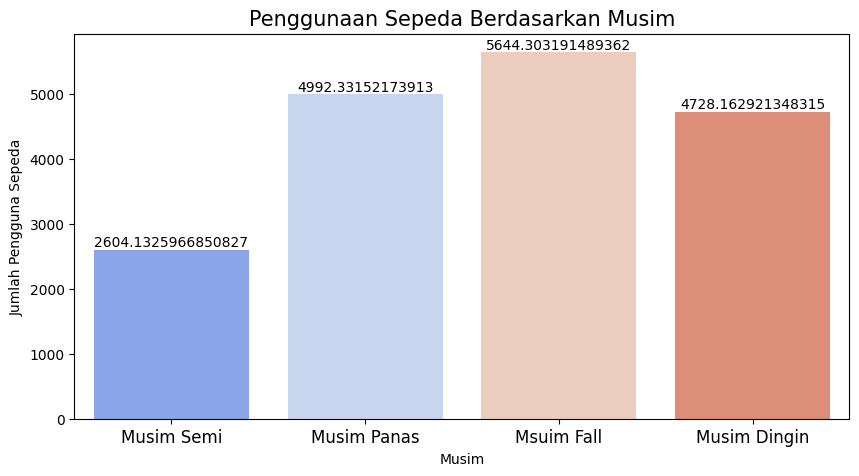

In [36]:
season_df = days_df.groupby(by="season").agg({
    "count": "mean"
})

plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="season",
    data=season_df.sort_values(by="count", ascending=False),
    palette='coolwarm'
)
plt.title("Penggunaan Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xlabel('Musim')
plt.tick_params(axis='x', labelsize=12)

for index, value in enumerate(season_df['count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

### Pertanyaan 2: Bagaimana Sebaran Data Pengguna Sepeda Pada Weekday dan Holiday?

<ipython-input-37-b6777721ae3b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_df = days_df.groupby(by=["weekday"]).agg({
<ipython-input-37-b6777721ae3b>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


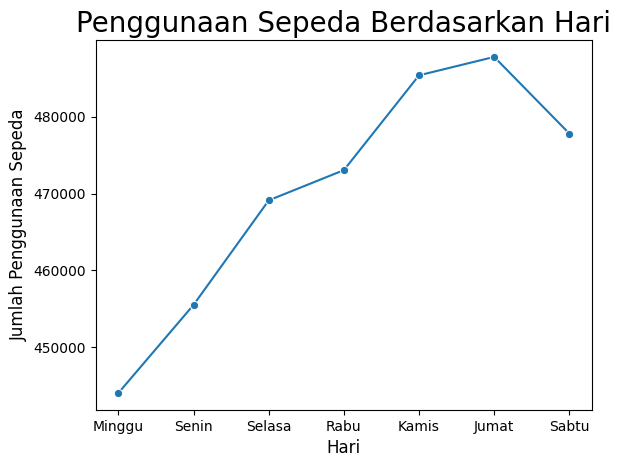

In [37]:
days_df['weekday'] = pd.Categorical(days_df['weekday'], categories=
    ['Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu'],ordered=True)

weekday_df = days_df.groupby(by=["weekday"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=weekday_df ,
    x="weekday",
    y="count",
    palette="darkred",
    marker="o")

plt.title("Penggunaan Sepeda Berdasarkan Hari", loc="center", fontsize=20)
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Jumlah Penggunaan Sepeda", fontsize=12)
plt.show()

### Pertanyaan 3: Berapa Presentase Pengguna Sepeda yang Berlangganan dan Yang Tidak Berlangganan?

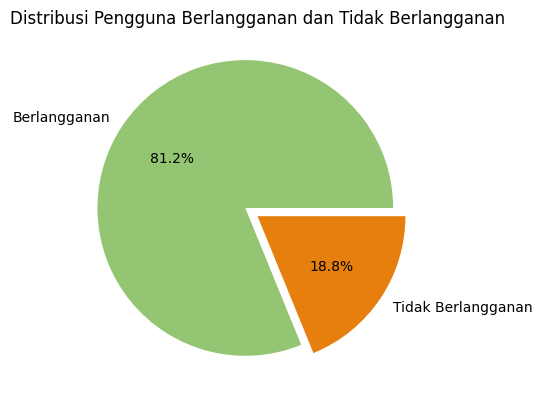

In [38]:
total_registered = days_df['registered'].sum()
total_causal = days_df['casual'].sum()


label = ['Berlangganan', 'Tidak Berlangganan']
ukuran = [total_registered, total_causal]
colors = ['#93C572', '#E67F0D']
explode = (0.1, 0)


plt.pie(
    x=ukuran,
    labels=label,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.title("Distribusi Pengguna Berlangganan dan Tidak Berlangganan")
plt.show()

**Insight:**
- Berdasarkan Hasil visualisasi, musin fall adalah musim yang paling banyak penggunaan sepeda dan musim spring menempati peringkat kedua musim dengan tingkat penggunaan sepeda tertinggi.
- Dari Hasil visualisasi menyatakan bahwa hari jumat adalah hari dengan penggunaan sepeda terbanyak.

## Analisis Lanjutan (Opsional)

In [39]:
#Total Pengguna Berdasarkan Registered
hours_df.groupby(by="humidity").agg({
    "count": ["count"]})


,count
,count
humidity,
0.00,22
0.08,1
0.10,1
0.12,1
0.13,1
...,...
0.93,331
0.94,560


## Conclusion

- Menjawab pertanyaan nomor 1: Berdasarkan Hasil Analisis Data, disimpulkan bahwa musin fall adalah musim yang paling banyak penggunaan sepeda dan musim semi menempati peringkat terakhir musim dengan tingkat penggunaan sepeda terendah.
- Menjawab pertanyaan nomor 2: Berdasarkan Hasil Analisis Data disimpulkan bahwa, hari jumat adalah hari yang paling banyak penggunaan sepeda. dan hari minggu adalah hari yang penggunaan sepedanya tidak banyak.
- Menjawab pertanyaan nomor 3: Berdasarkan Hasil Analisis Data, disimpulkan bahwa jumlah pengguna yang berlangganan adalah yang paling banyak sebesar 81,2%. Dan jumlah pengguna yang tidak berlangganan sebesar 18,8%.